In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input

In [2]:
# import dataset and shuffle data
df = pd.read_csv('dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
df


,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32,Subject,Position
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.505681,1.772890,0.999403,0.875608,0.000000,0.000000,0.000000,0.000000,4,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137934,1.869704,3.014471,...,18.865569,1.926509,0.005627,3.485642,4.106349,4.996474,0.000000,0.783566,5,1
2,0.000471,0.000000,0.009878,0.000000,0.000000,0.000000,0.000000,0.227331,5.294872,19.192637,...,2.042810,3.137733,0.000000,2.640310,3.510074,0.000000,0.000000,0.027158,7,0
3,0.126872,0.027181,0.939548,1.066931,1.363444,0.642622,0.821836,1.483096,3.038998,4.546058,...,6.742400,1.044409,0.000000,0.140603,2.207251,0.182705,0.000000,0.490003,7,0
4,0.000000,0.000000,0.000000,57.441253,62.663185,66.579634,73.107050,79.634465,75.718016,79.634465,...,56.135770,62.663185,57.441253,57.441253,57.441253,54.830287,0.000000,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0.000000,0.964383,1.714441,1.822391,6.828940,6.964357,4.117878,5.435598,4.156701,5.660156,...,5.096995,6.971843,0.355897,2.760084,1.174454,0.174656,0.000000,0.871543,6,1
2668,0.000000,0.603307,1.055645,1.075388,4.162377,4.178822,2.483791,3.296181,2.516198,3.397228,...,4.751870,6.830332,0.236259,2.584451,1.095976,0.194969,0.000000,0.767170,6,1
2669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046219,0.000000,...,1.900186,1.331900,0.165915,0.513799,0.285062,0.000000,0.000000,0.108207,2,0
2670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.111998,1.678434,0.323544,1.563355,1.812388,0.327641,0.057884,0.295888,9,0


In [3]:
# Split dataset in train, val and test
num_col = len(df.columns)
train_split = 2400
test_split = 2600

train_data = df.iloc[0:train_split, 0:num_col-2]
val_data = df.iloc[train_split:test_split, 0:num_col-2]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data = df.iloc[test_split:,:num_col-2]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data = np.array(test_data)
test_subject = np.array(test_subject)
test_position = np.array(test_position)
test_data = test_data.reshape(len(test_data), 64,32, 1)
test_data = test_data / 500
test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

print(test_subject.shape[1])

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, 0:num_col-2]
    val_data = df.iloc[train_split:test_split, 0:num_col-2]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data = df.iloc[test_split:,:num_col-2]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data = np.array(test_data)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    test_data = test_data.reshape(len(test_data), 64,32, 1)
    test_data = test_data / 500
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)


13


In [4]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)

train_data = train_data.reshape(len(train_data), 64,32, 1)
val_data = val_data.reshape(len(val_data), 64,32, 1)

print(train_data.shape)
print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)


(2400, 64, 32, 1)
(2400, 1)
(2400, 1)
(200, 64, 32, 1)
(200, 1)
(200, 1)


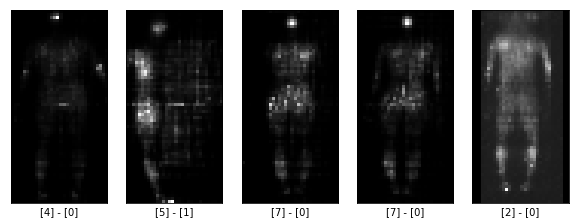

In [5]:
plt.figure(figsize=(10,5))
i = 0

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(train_subject[i-1]) + ' - ' + str(train_position[i-1])
    plt.imshow(train_data[i-1].reshape((64, 32)), cmap='gray')
    plt.xlabel(label)
    

In [6]:
# normalize data and build categorical labels
train_data = train_data / 500
val_data = val_data / 500

train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [7]:
inp = Input((64, 32, 1),)

x = Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 32, 1))(inp)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)
    
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

p = Flatten()(x)
p = Dense(120, activation='relu')(p)
p = Dense(84, activation='relu')(p)

p = Dropout(0.4)(p)

position = Dense(3, activation='softmax')(p)

s = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
s = MaxPooling2D((2, 2))(s)
s = Dropout(0.4)(s)

s = Flatten()(s)
s = Dense(120, activation='relu')(s)
s = Dense(84, activation='relu')(s)

s = Dropout(0.4)(s)

subject = Dense(13, activation='softmax')(s)

model_subject = Model(inp, subject)
model_position = Model(inp, position)

In [8]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_subject.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
model_position.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_subject.summary()
model_position.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 7, 16)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 7, 16)         0     

In [9]:
#train subject model
history = History()

train_subject = model_subject.fit(train_data, train_subject, validation_data = (val_data, val_subject), epochs=200,batch_size = 8, callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/200
2400/2400 [==============================] - 6s 3ms/sample - loss: 2.5424 - accuracy: 0.0879 - val_loss: 2.4944 - val_accuracy: 0.0950
Epoch 2/200
2400/2400 [==============================] - 5s 2ms/sample - loss: 2.4623 - accuracy: 0.1375 - val_loss: 2.3346 - val_accuracy: 0.1950
Epoch 3/200
2400/2400 [==============================] - 5s 2ms/sample - loss: 2.3194 - accuracy: 0.1908 - val_loss: 2.0183 - val_accuracy: 0.3800
Epoch 4/200
2400/2400 [==============================] - 6s 2ms/sample - loss: 2.1201 - accuracy: 0.2912 - val_loss: 1.7918 - val_accuracy: 0.5100
Epoch 5/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 1.8934 - accuracy: 0.3575 - val_loss: 1.3870 - val_accuracy: 0.6100
Epoch 6/200
2400/2400 [==============================] - 5s 2ms/sample - loss: 1.7240 - accuracy: 0.4092 - val_loss: 1.2623 - val_accuracy: 0.6550
Epoch 7/200
2400/2400 [==============================] - 4s 2ms/sample 

2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4318 - accuracy: 0.8487 - val_loss: 0.3857 - val_accuracy: 0.8800
Epoch 57/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4622 - accuracy: 0.8487 - val_loss: 0.4351 - val_accuracy: 0.8700
Epoch 58/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4521 - accuracy: 0.8454 - val_loss: 0.4150 - val_accuracy: 0.8750
Epoch 59/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4577 - accuracy: 0.8450 - val_loss: 0.3889 - val_accuracy: 0.8850
Epoch 60/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4690 - accuracy: 0.8438 - val_loss: 0.3894 - val_accuracy: 0.8750
Epoch 61/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4320 - accuracy: 0.8546 - val_loss: 0.3906 - val_accuracy: 0.8850
Epoch 62/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4330 - accuracy: 0.8587 - val_loss: 0.4151 

2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3337 - accuracy: 0.8763 - val_loss: 0.3986 - val_accuracy: 0.8850
Epoch 112/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3518 - accuracy: 0.8779 - val_loss: 0.3828 - val_accuracy: 0.8950
Epoch 113/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3512 - accuracy: 0.8775 - val_loss: 0.4035 - val_accuracy: 0.8850
Epoch 114/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2935 - accuracy: 0.8942 - val_loss: 0.4526 - val_accuracy: 0.9000
Epoch 115/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3297 - accuracy: 0.8813 - val_loss: 0.4563 - val_accuracy: 0.8850
Epoch 116/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3014 - accuracy: 0.8908 - val_loss: 0.4381 - val_accuracy: 0.8900
Epoch 117/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3449 - accuracy: 0.8842 - val_loss: 0

2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2697 - accuracy: 0.9038 - val_loss: 0.4569 - val_accuracy: 0.9000
Epoch 167/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2936 - accuracy: 0.9050 - val_loss: 0.4555 - val_accuracy: 0.8850
Epoch 168/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3042 - accuracy: 0.9029 - val_loss: 0.4503 - val_accuracy: 0.8950
Epoch 169/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2882 - accuracy: 0.8975 - val_loss: 0.4750 - val_accuracy: 0.8950
Epoch 170/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2636 - accuracy: 0.9071 - val_loss: 0.5003 - val_accuracy: 0.8900
Epoch 171/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2759 - accuracy: 0.9046 - val_loss: 0.5098 - val_accuracy: 0.8750
Epoch 172/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2786 - accuracy: 0.9079 - val_loss: 0

Text(0, 0.5, 'Accuracy')

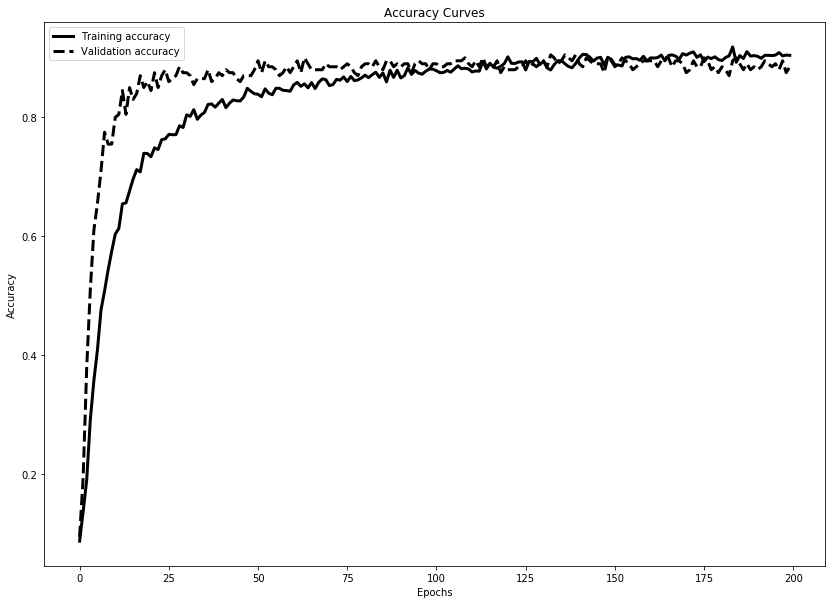

In [10]:
plt.figure(figsize = (14,10))
plt.plot(history.history['accuracy'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_accuracy'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [11]:
#train position model
history = History()

train_position = model_position.fit(train_data, train_position, validation_data = (val_data, val_position), epochs=10, callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/10
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2976 - accuracy: 0.8929 - val_loss: 0.1833 - val_accuracy: 0.9500
Epoch 2/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0849 - accuracy: 0.9708 - val_loss: 0.1602 - val_accuracy: 0.9700
Epoch 3/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0484 - accuracy: 0.9796 - val_loss: 0.1760 - val_accuracy: 0.9600
Epoch 4/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0436 - accuracy: 0.9854 - val_loss: 0.1692 - val_accuracy: 0.9600
Epoch 5/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0309 - accuracy: 0.9867 - val_loss: 0.1587 - val_accuracy: 0.9700
Epoch 6/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0194 - accuracy: 0.9929 - val_loss: 0.1625 - val_accuracy: 0.9600
Epoch 7/10
2400/2400 [==============================] - 3s 1ms/sample - loss:

Text(0, 0.5, 'Accuracy')

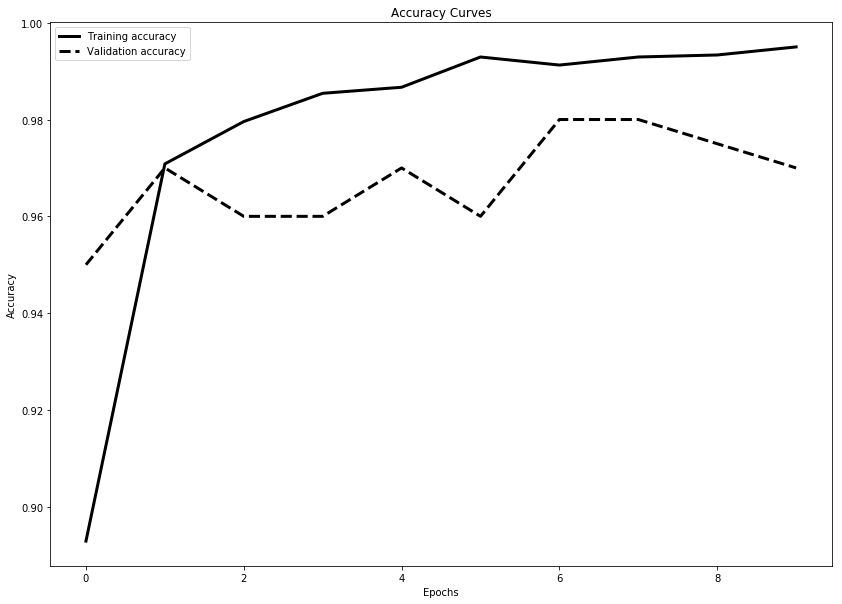

In [12]:
plt.figure(figsize = (14,10))
plt.plot(history.history['accuracy'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_accuracy'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [13]:
model_subject.evaluate(test_data, test_subject)
model_position.evaluate(test_data, test_position)


72/72 [==============================] - 0s 370us/sample - loss: 0.0011 - accuracy: 1.0000


[0.0010853169822237557, 1.0]

,Subject,Position
2600,11,2
2601,4,0
2602,12,0
2603,6,0
2604,7,0
2605,6,0
2606,1,0
2607,2,2
2608,4,0
2609,7,2


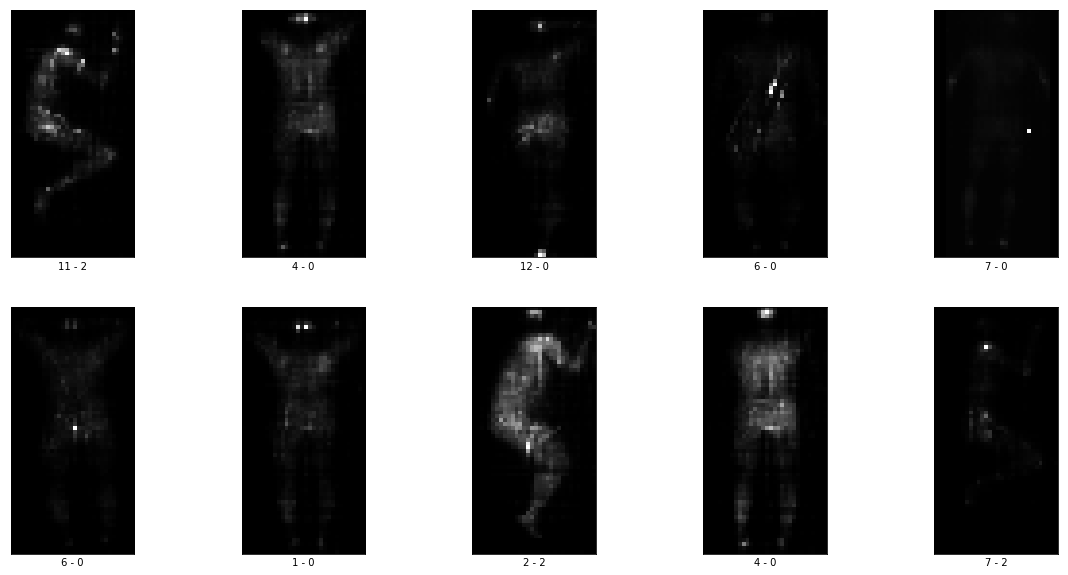

In [14]:
predictions_subject = model_subject.predict(test_data)
predictions_position = model_position.predict(test_data)

predictions_subject = predictions_subject.argmax(axis=-1)
predictions_position = predictions_position.argmax(axis=-1)

plt.figure(figsize=(20,10))

for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(predictions_subject[i-1]) + ' - ' + str(predictions_position[i-1])
    plt.imshow(test_data[i-1].reshape(64, 32), cmap='gray')
    plt.xlabel(label)

test_labels = df.iloc[test_split:, num_col-2:num_col]
test_labels.head(10)


In [15]:
#save model and architecture to single file
model_subject.save("model_subject.h5")
model_position.save("model_position.h5")

with open('test.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([test_data, test_subject, test_position], f)